In [435]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

# Assignment 2

## Name: Chanpreet Singh (1576137)

# Data Exploration

this assignment is to predict the values of the sale price by applying regression models
*   analysis the correlation of features, choose the features with correlation index larger than 0.2
*   dealing with categorical data
*   dealing with missing data

In [436]:
# DATA: House Price Prediction

data = pd.read_csv('data.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Use the space below to insert your code for data exploration ...

In [438]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


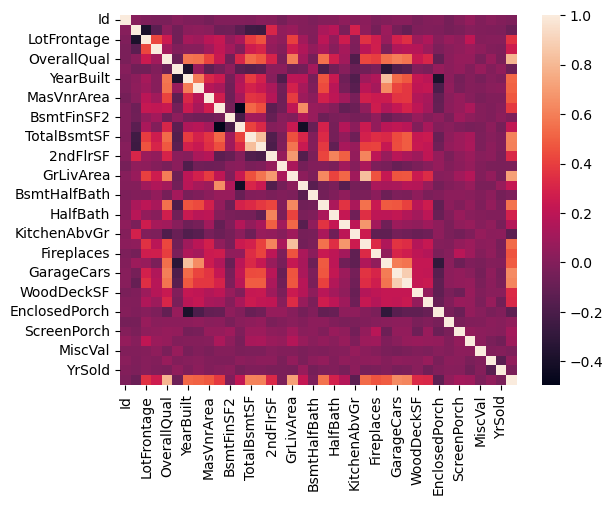

In [439]:
sns.heatmap(data.corr())
plt.show()


## Data Cleaning

see: https://www.bogotobogo.com/python/scikit-learn/scikit_machine_learning_Data_Preprocessing-Missing-Data-Categorical-Data.php

### Categorical Data (removing or replacing them)

In [440]:
from sklearn.preprocessing import LabelEncoder

In [441]:
label_encoder = LabelEncoder()

In [442]:

categorical_columns = list(data.columns)

unwanted_columns = ['Id','MSSubClass','LotFrontage','Alley','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

categorical_columns2 = [col for col in categorical_columns if col not in unwanted_columns]

for col in categorical_columns2:
    data[col] = label_encoder.fit_transform(data[col])

# data['Street'] = label_encoder.fit_transform(data['Street'])

# data['LotShape'] = label_encoder.fit_transform(data['LotShape'])


# data['Street'].value_counts()[0]
# data['LotShape']

data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,NaN,3,3,0,...,0,3,4,4,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,NaN,3,3,0,...,0,3,4,4,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,NaN,0,3,0,...,0,3,4,4,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,NaN,0,3,0,...,0,3,4,4,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,NaN,0,3,0,...,0,3,4,4,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,NaN,3,3,0,...,0,3,4,4,0,8,2007,8,4,175000
1456,1457,20,3,85.0,13175,1,NaN,3,3,0,...,0,3,2,4,0,2,2010,8,4,210000
1457,1458,70,3,66.0,9042,1,NaN,3,3,0,...,0,3,0,2,2500,5,2010,8,4,266500
1458,1459,20,3,68.0,9717,1,NaN,3,3,0,...,0,3,4,4,0,4,2010,8,4,142125


### Missing Data (finding and replacing)

In [443]:
data = data.dropna(subset=['LotFrontage'])
data = data.drop('Alley', axis=1)
data = data.drop('MasVnrArea', axis=1)
data = data.dropna()

print(data.info())
data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1127 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1127 non-null   int64  
 1   MSSubClass     1127 non-null   int64  
 2   MSZoning       1127 non-null   int64  
 3   LotFrontage    1127 non-null   float64
 4   LotArea        1127 non-null   int64  
 5   Street         1127 non-null   int64  
 6   LotShape       1127 non-null   int64  
 7   LandContour    1127 non-null   int64  
 8   Utilities      1127 non-null   int64  
 9   LotConfig      1127 non-null   int64  
 10  LandSlope      1127 non-null   int64  
 11  Neighborhood   1127 non-null   int64  
 12  Condition1     1127 non-null   int64  
 13  Condition2     1127 non-null   int64  
 14  BldgType       1127 non-null   int64  
 15  HouseStyle     1127 non-null   int64  
 16  OverallQual    1127 non-null   int64  
 17  OverallCond    1127 non-null   int64  
 18  YearBuil

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,3,3,0,4,...,0,3,4,4,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,3,3,0,2,...,0,3,4,4,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0,3,0,4,...,0,3,4,4,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,3,0,0,...,0,3,4,4,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0,3,0,2,...,0,3,4,4,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,3,3,0,4,...,0,3,4,4,0,8,2007,8,4,175000
1456,1457,20,3,85.0,13175,1,3,3,0,4,...,0,3,2,4,0,2,2010,8,4,210000
1457,1458,70,3,66.0,9042,1,3,3,0,4,...,0,3,0,2,2500,5,2010,8,4,266500
1458,1459,20,3,68.0,9717,1,3,3,0,4,...,0,3,4,4,0,4,2010,8,4,142125


## Correlation

In [444]:
import pandas as pd

corr_matrix = data.corr()

corr_values = abs(corr_matrix['SalePrice'])

selected_features = corr_values[corr_values > 0.2].index.tolist()

data = data[selected_features]

print(len(data))

data

1127


,LotFrontage,LotArea,LotShape,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,ExterQual,Foundation,...,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SaleCondition,SalePrice
0,65.0,8450,3,5,7,2003,2003,1,2,2,...,5,1,2003.0,1,2,548,0,61,4,208500
1,80.0,9600,3,24,6,1976,1976,1,3,1,...,4,1,1976.0,1,2,460,298,0,4,181500
2,68.0,11250,0,5,7,2001,2002,1,2,2,...,4,1,2001.0,1,2,608,0,42,4,223500
3,60.0,9550,0,6,7,1915,1970,1,3,0,...,2,5,1998.0,2,3,642,0,35,0,140000
4,84.0,14260,0,15,8,2000,2000,1,2,2,...,4,1,2000.0,1,3,836,192,84,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,3,8,6,1999,2000,1,3,2,...,4,1,1999.0,1,2,460,0,40,4,175000
1456,85.0,13175,3,14,6,1978,1988,1,3,1,...,4,1,1978.0,2,2,500,349,0,4,210000
1457,66.0,9042,3,6,7,1941,2006,1,0,4,...,2,1,1941.0,1,1,252,0,60,4,266500
1458,68.0,9717,3,12,5,1950,1996,3,3,1,...,5,1,1950.0,2,1,240,366,0,4,142125


## Heatmap

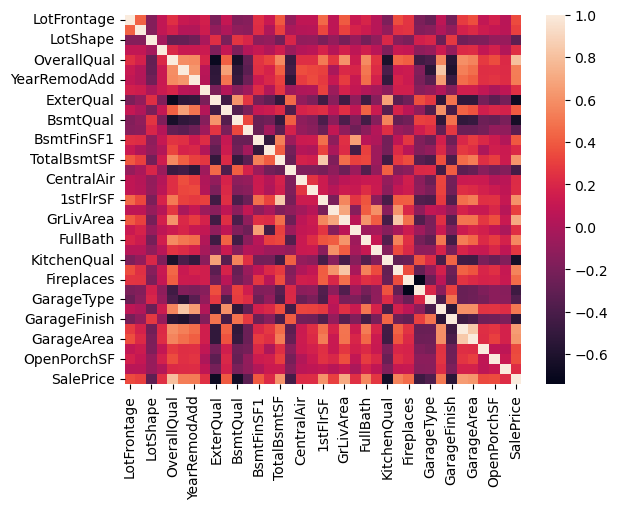

In [445]:

sns.heatmap(data.corr())

plt.show()

# linear regression

1. what is linear regression?

It is a meathod to predict a continous value based on set of observations. It mean we can use linear regression to find price of a house on basis of rooms, area, location, etc provided we have data which help us understand the relatiopnship between price of house and house features such as rooms, area, location etc. Thus house price is dependable on house features.


2. why we choose the linear regression model?

Linear regression model assumes linear relationship between input variables and single output variable. It is simple compared to other models and can be used in this case as sale price would linearly depend on the house factors. Their might be more or less correlations among features and sale price, however overall the relationship shall still stay linear in most cases. 

In [446]:
from sklearn.linear_model import LinearRegression

X = data.drop('SalePrice', axis=1).values

Y= data['SalePrice'].values.reshape(len(X),1)



reg = LinearRegression()

reg.fit(X, Y)

coefficients = reg.coef_
intercept = reg.intercept_

print('Coefficients: ', coefficients)
print('Intercept: ', intercept)


score_train, score_test = sklreg.score(X_train,Y_train),sklreg.score(X_test,Y_test)
score_train, score_test


Coefficients:  [[-4.69319942e+01  6.35532913e-01 -1.91941809e+03  4.42441180e+02
   1.33993584e+04  1.22769450e+02  9.84663169e+01  3.02939439e+03
  -1.00374155e+04 -1.00802657e+02 -7.78779721e+03 -3.26004395e+03
   6.55695632e+00 -9.33369179e+00  8.37397675e+00 -1.11416692e+03
   1.93896210e+04 -2.47750836e+02  1.36398939e+01  7.64821814e+00
   2.89298741e+01  3.46582226e+03  1.71566335e+03  1.79963397e+03
  -1.04298809e+04  1.57975282e+03  2.84953524e+03 -1.82403948e+03
   1.29789740e+02 -1.86375401e+02 -1.40873129e+03  1.46509396e+04
   7.75184657e+00  1.81964122e+01 -9.84807052e-01  2.56771855e+03]]
Intercept:  [-37818.12367386]


(-191902299123.88843, -169828490878.2288)

In [447]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X , Y , test_size = 0.2, random_state = 0)


In [448]:
def predict(Features, Weights):
    return Features @ Weights

def cost_function(X, Y, Weights):
    N = len(Y)
    Ypred = predict(X, Weights)
    sq_error = (Y - Ypred)**2
    return 1/(2*N) * sq_error.sum()

def update_weights(X, Y, Weights, learning_rate):
    N = len(Y)
    Ypred = predict(X, Weights)
    error = Ypred - Y
    grad = (error.T @ X).T
    newWeights = Weights - learning_rate *(1/N) * grad
    return newWeights
    
def train(X, Y, learning_rate, n_iterations):
    # Step to log the intermediant result
    step = n_iterations/10
    
    # History of cost function progress
    mse_history = []
    
    # History on weights change
    w_history = []
    
    # Adding bias term (w0)
    bias = np.ones(shape=(len(X),1))
    Features = np.append(bias, X, axis=1)
    
    # Initial setup of Weights to 1
#     Weights = 0.2*np.ones((Features.shape[1],1))
    Weights = np.random.ranf([Features.shape[1],1])
    
    print("iter\t Cost \t\t Weights")
    for i in range(n_iterations):
        Weights = update_weights(Features, Y, Weights, learning_rate)
        cost = cost_function(Features, Y, Weights)
        mse_history.append(cost)
        w_history.append(Weights.flatten())
        if i%step==0:
            print("{}\t{:0.8}\t{}".format(i,cost,Weights.T))
    return Weights, mse_history, w_history

In [449]:
import linear_regression as linreg
%time w, h, w_h = train(X_train,Y_train, 0.00001, 200000)

iter	 Cost 		 Weights
0	4.6617098e+16	[[2.63267048e+00 1.37374576e+02 2.07466935e+04 4.14561070e+00
  2.45189449e+01 1.31930642e+01 3.60445443e+03 3.62476652e+03
  3.44150354e+00 4.83845293e+00 3.25130114e+00 4.37693234e+00
  4.77756294e+00 9.82640928e+02 1.17325331e+03 2.23058830e+03
  2.28776382e+00 2.53359453e+00 7.19093465e+00 2.36958034e+03
  7.54450058e+02 3.13369990e+03 1.35072079e+00 3.30879491e+00
  1.71696444e+00 4.09110636e+00 1.28550120e+01 1.41664247e+00
  6.70629265e+00 3.92912861e+00 3.61386759e+03 2.53549378e+00
  3.84694848e+00 1.03307353e+03 2.10357041e+02 1.06452243e+02
  8.01223859e+00]]


/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:48: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/var/folders/pj/d61lgtm157q40w_2_3r552900000gn/T/ipykernel_11020/3318522938.py:7: RuntimeWarning: overflow encountered in square
  sq_error = (Y - Ypred)**2
/var/folders/pj/d61lgtm157q40w_2_3r552900000gn/T/ipykernel_11020/3318522938.py:14: RuntimeWarning: overflow encountered in matmul
  grad = (error.T @ X).T
/var/folders/pj/d61lgtm157q40w_2_3r552900000gn/T/ipykernel_11020/3318522938.py:2: RuntimeWarning: invalid value encountered in matmul
  return Features @ Weights
/var/folders/pj/d61lgtm157q40w_2_3r552900000gn/T/ipykernel_11020/3318522938.py:14: RuntimeWarning: invalid value encountered in matmul
  grad = (error.T @ X).T


20000	nan	[[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan]]
40000	nan	[[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan]]
60000	nan	[[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan]]
80000	nan	[[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan]]
100000	nan	[[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan]]
120000	nan	[[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan]]
14

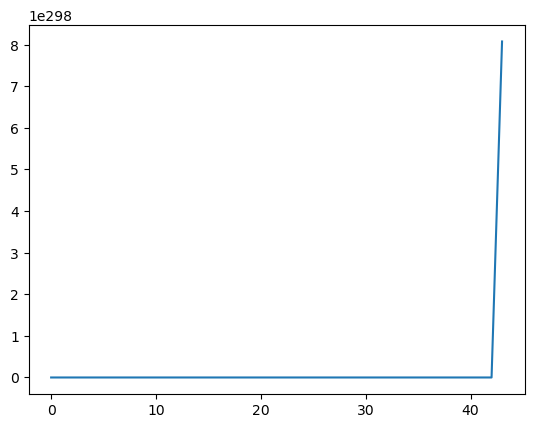

In [450]:
plt.plot(h)


*   what are scaling techniques?

We use scaling techniques to change the data into some standard range of values to make a fairer comparison and minimize the impact of outliers. We mainly do either normalization or standardization as scaling techniques. 


using two scaling method to train the linear regression again to discuss what the difference is

iter	 Cost 		 Weights
0	2.123363e+10	[[188.73610435  35.24635134   9.07841876 122.34327621 103.02719211
  113.06907299 145.79748667 130.10188646  73.72319021 142.43388572
   58.81306122  90.70118574 100.43935356  18.00483351  51.98544961
   38.2023705   52.67825969 182.66966033 143.51282437  37.06427385
   37.85437776  45.37886261  46.41858462 109.78654308  42.22733885
  127.43129397  84.98700869  47.2096922  129.63610813  77.82078677
  142.47897922  93.86285179  69.74388723  61.89703068  25.56386802
   22.10942712 149.09530741]]
3000	1.2349647e+09	[[ 22905.20710761   8722.57387376   3249.36285742  -4374.54513869
   19526.558722    31548.32183098  25892.99698989  27893.09731545
   16786.8589202   -4057.52884331  11083.27633695  -8876.19476851
   -1897.98027305   7673.51038747  10485.52783743  11242.36814287
   -9980.8312415   22860.77166601  18367.82886667  13000.45831765
   13155.37541794  15940.2355445   14750.49353856  23847.78821915
   11661.38126216 -10725.99462483  24001.49150653

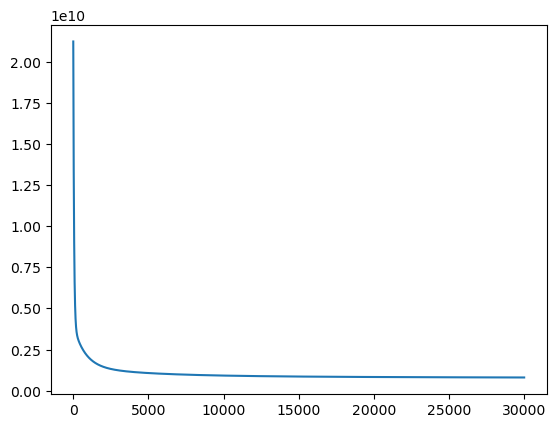

In [451]:
# Using normalization
def normalization(Features):
    """
    Take a set of features return normalize values using
    (x -xmin) / (xmax – xmin) of each feature
    """
    fmin = np.min(Features,axis=0)
    fmax = np.max(Features,axis=0)
    Features_norm = (Features - fmin)/(fmax-fmin)
    return Features_norm

X_train_norm = normalization(X_train)

%time w_n, h_n, w_h_n = train(X_train_norm,Y_train, 0.001, 30000)

plt.plot(h_n)

iter	 Cost 		 Weights
0	2.1486901e+10	[[189.05807588  31.40883871  26.19953614 -26.47224965  22.94990016
   70.21292575  46.04460075  45.05410232  21.95698256 -57.63638953
   34.81329274 -55.55918762 -29.60479614  36.17236714  19.35218176
   55.11857569 -35.92468589  17.86705688  20.37296512  54.90474566
   25.61080536  61.32317869  22.69687315  50.08957488  22.97554066
  -57.32853196  48.21759994  41.35753766 -41.27047973 -32.24883674
   44.35090924 -47.82698771  56.91155727  54.22396898  32.31243999
   30.88691374  20.61281901]]
3000	7.7249956e+08	[[ 1.79299751e+05 -1.10200514e+03  5.10574781e+03 -2.74110567e+03
   3.41269039e+03  1.41251989e+04  1.29198306e+03  3.00760117e+03
   3.30103518e+03 -7.02443360e+03  1.84122183e+01 -7.07881150e+03
  -4.40067763e+03  5.05136254e+03 -1.07203419e+03  4.36157739e+03
  -2.11934876e+03  3.47400833e+03 -3.85188498e+02  6.27463288e+03
   5.60520030e+03  9.46397216e+03  2.36909889e+03  3.27457973e+03
   2.66122878e+03 -1.01828162e+04  4.78874007e+0

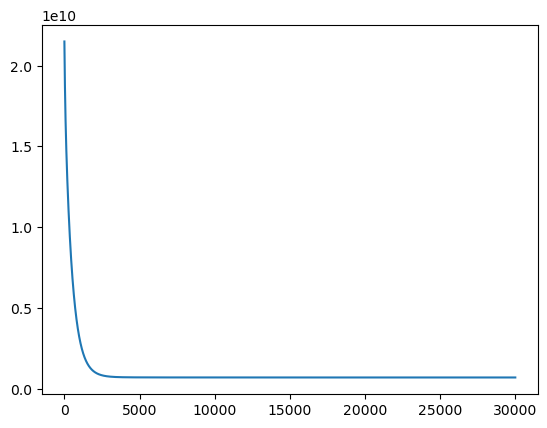

In [452]:
# Using Standardization
def standardization(Features):
    """
    Take a set of features return normalize values using
    the mean and standard deviation of each feature
    """
    mean=np.mean(Features,axis=0)
    std=np.std(Features,axis=0)
    Features_zss = (Features - mean)/std
    return Features_zss

X_train_std = standardization(X_train)

%time w_s, h_s, w_h_s = train(X_train_std, Y_train, 0.001, 30000)

plt.plot(h_s)

# logistic regression

1. what is logistic regression?

In logistic regression we make prediction on basis of discrete values. We no longer need continous values as needed in linear regression. There are three types of logistic regressions, binary (yes/no), multi (apple, banana, organce) and ordinal (low, medium, high). 


2. why we use the logistic regression model?

We can use logistic regression modes for tasks such as finding which whine it is based on grapes used, region, color, etc. We can use it for binary, multi or ordinal predictions on discrete data. 

we assume the sale price less than 200000 has label 0, otherwise it has label 1.

In [453]:
# data preperation (assign categories, split ...)

labels = np.ones(shape=(len(data),1))
labels[data['SalePrice']<200000] = 0



In [454]:

X = data.drop('SalePrice', axis=1).values


Y = labels.reshape(len(X),1)



In [455]:
# use function LogisticRegression()
# display precition, recall, classification_report
from sklearn import linear_model

logreg = linear_model.LogisticRegression(solver='lbfgs')


logreg.fit(X,Y)

logreg.coef_,logreg.intercept_

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(array([[ 1.60442926e-04,  1.93484282e-05, -8.76100658e-04,
          2.59601914e-04,  1.62838046e-03,  5.53967348e-03,
         -3.70788147e-03, -1.44950069e-04, -7.75053834e-04,
          6.76677023e-04, -8.41428099e-04, -6.41186542e-04,
          2.23328185e-03,  1.70864320e-03,  1.83117877e-03,
         -1.94284882e-03,  1.05985092e-04,  3.57099781e-04,
          3.52720679e-03,  5.30392999e-03, -1.97307840e-03,
          1.53836060e-04,  2.91322153e-04,  6.43357372e-05,
         -9.88121643e-04, -2.93995254e-04,  1.88972260e-04,
         -8.19047794e-04, -1.23601998e-03, -7.53311559e-03,
         -6.72548313e-04,  1.74789000e-04,  4.67517226e-03,
          1.63512350e-03,  6.75626569e-03,  4.50726008e-04]]),
 array([-1.60548513e-05]))

In [456]:
Ypre = logreg.predict(X)

In [457]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y, Ypre)
pd.DataFrame(cm)

,0,1
0,734,38
1,83,272


In [458]:
print("Model accuracity:",accuracy_score(Y,Ypre))

Model accuracity: 0.8926353149955635


In [459]:
from sklearn.metrics import precision_score, recall_score, classification_report


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

from sklearn import linear_model

model = linear_model.LogisticRegression(solver='lbfgs')

model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)



precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
classification = classification_report(Y_test, Y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("Classification report:")
print(classification)

Precision: 0.8823529411764706
Recall: 0.6716417910447762
Classification report:
              precision    recall  f1-score   support

         0.0       0.87      0.96      0.92       159
         1.0       0.88      0.67      0.76        67

    accuracy                           0.88       226
   macro avg       0.88      0.82      0.84       226
weighted avg       0.88      0.88      0.87       226



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
